In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.cm as cmx

In [16]:
summaryBatch_global = pd.read_json("./global/summaryBatch.json")
summaryBatch_global = summaryBatch_global[["k","clusters","s1. agg m","s1. max m","s1. peak","s2. agg m","s2. max m","s2. peak","total m"]]

In [17]:
batch_global = pd.read_json("./global/batch.json")

In [18]:
summaryBatch_global

,k,clusters,s1. agg m,s1. max m,s1. peak,s2. agg m,s2. max m,s2. peak,total m
0,1,[189],1.371114,1.371114,676.160150,1.284301,1.284301,633.348667,1.284301
1,2,"[95, 94]",1.000000,1.371114,341.647200,1.009352,1.287300,320.762883,1.275193
2,3,"[42, 34, 113]",1.000007,1.461032,492.058050,1.021967,1.316365,443.335850,1.303961
3,4,"[57, 63, 41, 28]",1.000127,1.485290,265.469917,1.049070,1.390578,240.844383,1.320364
4,5,"[50, 21, 40, 46, 32]",1.000355,1.637695,243.410700,1.077833,1.426521,190.383117,1.308784
5,6,"[33, 13, 71, 29, 24, 19]",1.010122,1.726447,383.596300,1.063379,1.415940,294.851850,1.298971


In [20]:
with open('summaryBatch.tex','w') as tf:
    tf.write(summaryBatch_global.to_latex())

In [21]:
norm = colors.Normalize(vmin=0, vmax=1000)

#colormap possible values = viridis, jet, spectral
rgba_color = cm.gnuplot(norm(400),bytes=True)
rgba_color

(161, 16, 149, 255)

In [22]:
def plot(data):
    for runIdx in range(0, len(data)):
        fig, ax = plt.subplots()
        clusters_step1 = data.iloc[runIdx]["steps"][0]["clusters"]
        clusters_step2 = data.iloc[runIdx]["steps"][1]["clusters"]
        norm = colors.Normalize(vmin=0, vmax=len(clusters_step1))
        for cIdx in range(0, len(clusters_step1)):
            rgba_color = cm.gnuplot(norm(cIdx))
            ax.plot(clusters_step1[cIdx]["syntheticCenter"], "--", color=rgba_color, label="cluster %s" % cIdx)
            ax.plot(clusters_step2[cIdx]["syntheticCenter"], color=rgba_color, label="cluster %s - rescheduled" % cIdx)
            print(clusters_step1[cIdx]["metric"])
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set(xlabel='Hours', ylabel='Power (W)',title='')
        plt.show()

1.371113879920646


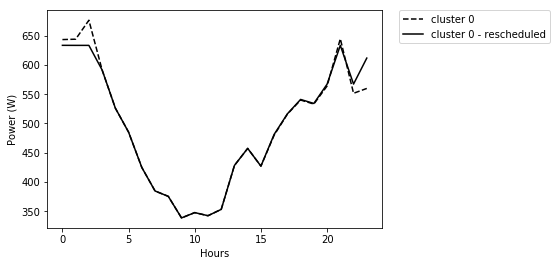

1.371113716414756
1.3711140400122561


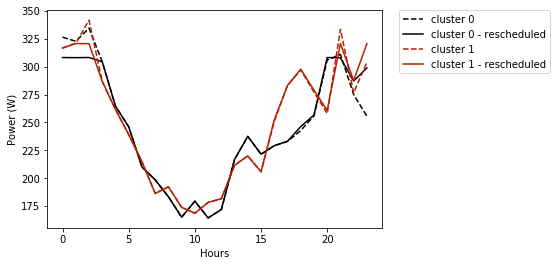

1.461021697832038
1.461014011680464
1.461032481157027


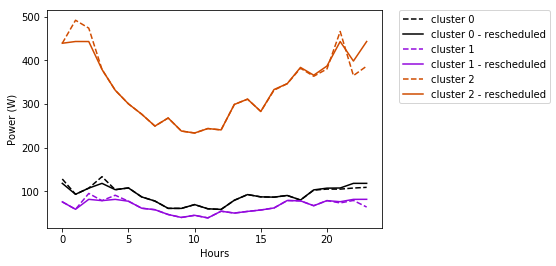

1.485249983243
1.485290184271142
1.485093337123129
1.484773256458525


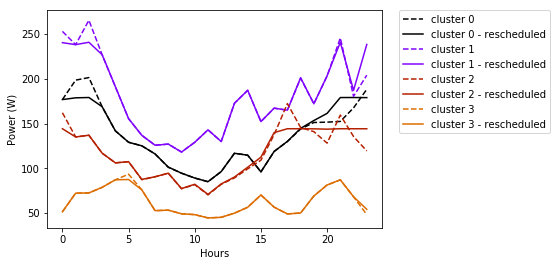

1.6376948445321942
1.637681648634889
1.6368055543106181
1.635918932078501
1.6374711878639552


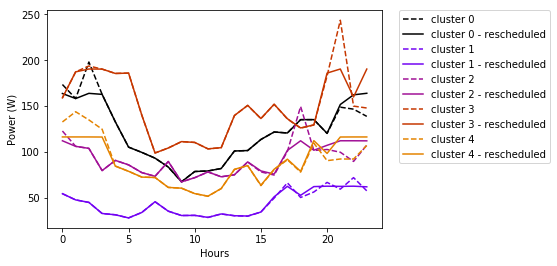

1.7257649345002002
1.723214233063733
1.6286210598799329
1.726446610705664
1.72472761617666
1.7261054817548862


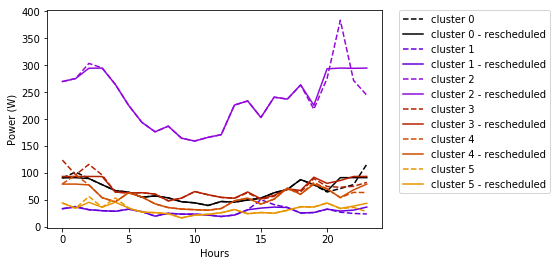

In [23]:
plot(batch_global)

In [24]:
summaryBatch_local = pd.read_json("./local/summaryBatch.json")
summaryBatch_local = summaryBatch_local[["k","clusters","s1. agg m","s1. max m","s1. peak","s2. agg m","s2. max m","s2. peak","total m"]]
batch_local = pd.read_json("./local/batch.json")

In [25]:
summaryBatch_local

,k,clusters,s1. agg m,s1. max m,s1. peak,s2. agg m,s2. max m,s2. peak,total m
0,1,[189],1.371114,1.371114,676.160150,1.284301,1.284301,633.348667,1.284301
1,2,"[71, 118]",1.000000,1.399867,422.560117,1.003682,1.285334,385.141000,1.279518
2,3,"[50, 135, 4]",1.000045,1.378026,494.357733,1.056240,1.294426,464.366717,1.272688
3,4,"[23, 14, 3, 149]",1.000235,1.371130,522.809017,1.064128,1.323642,504.702250,1.302955
4,5,"[14, 16, 12, 5, 142]",1.001077,1.380518,511.882117,1.049105,1.312757,472.498133,1.261584
5,6,"[72, 71, 14, 13, 11, 8]",1.003333,1.567744,284.432333,1.130834,1.557311,236.555300,1.307056


1.371113879920646


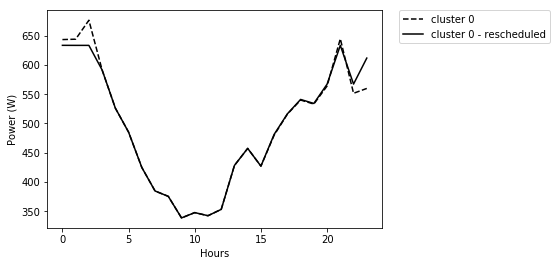

1.39986689515957
1.399866999806939


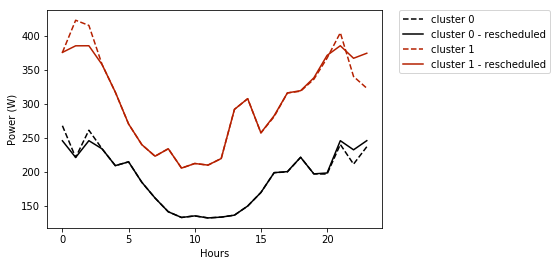

1.37794973977419
1.378026442388059
1.377915249051688


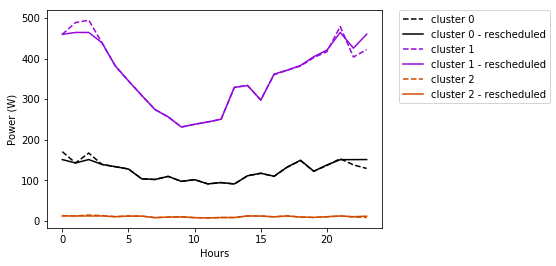

1.371126106461573
1.371066068240585
1.369909579344029
1.371129501555508


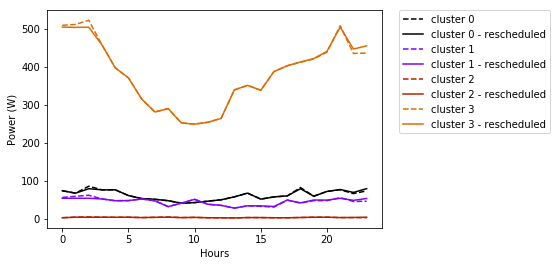

1.376841669053271
1.380494905923149
1.379212109584803
1.378099963630088
1.380517847126302


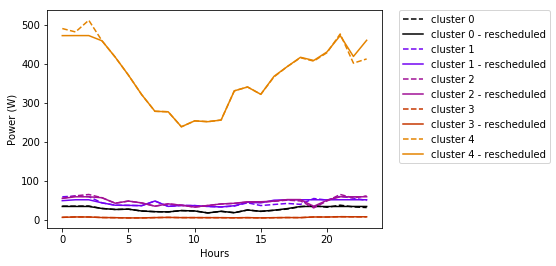

1.5661188878639232
1.549095422316238
1.559829521086126
1.566645736542181
1.56578540953789
1.567743613200952


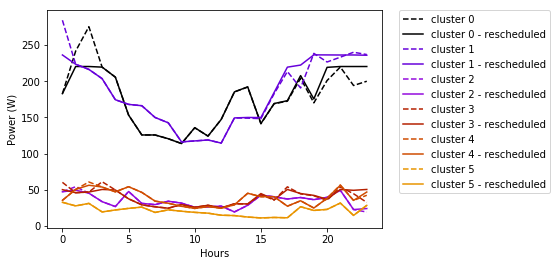

In [26]:
plot(batch_local)